# Árboles de Decisión y *random forest*

En el presente notebook, se van a entrenar un modelo árbol de decisión y un módelo *random forest*, con el dataset ***iris*** que es de la librería *sklearn*.

In [1]:
# Librerías comunes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

## Dataset ***iris***

El **dataset iris** se compone de 150 registros, en los que se representan 3 tipos de las flores iris. La información de cada variante se representa por las medidas del sépalo y petalo en cm:
  * longitud del sépalo
  * anchura del sépalo
  * longitud de los pétalos
  * anchura de los pétalos

Antes de entrenar los modelos, se realizará lo siguiente en el dataset:
 1. Distribución de clases (dataset balanceado)
 2. Análisis de las variables de entrada
 3. División del dataset
 3. Normalización (opcional)

 ## Carga del dataset

In [2]:
from sklearn.datasets import load_iris

In [3]:
X_whole, y_whole = load_iris(return_X_y=True, as_frame=True)

In [4]:
print(load_iris()["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Distribución de clases

Número de registros por clase


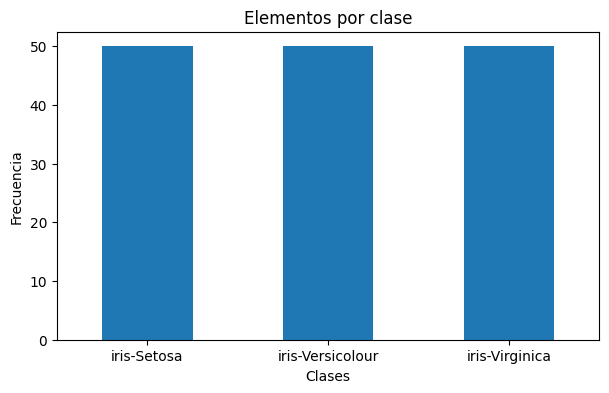

In [5]:
class_labels = ['iris-Setosa', 'iris-Versicolour', 'iris-Virginica']

print("Número de registros por clase")
ax = pd.Series(list(y_whole)).value_counts().plot(kind='bar',
                                    figsize=(7,4),
                                    title="Elementos por clase")
ax.set_xlabel("Clases")
ax.set_ylabel("Frecuencia")
ax.set_xticklabels(class_labels)
plt.xticks(rotation=0)
plt.show()

### Análisis de las variables de entrada

Estadística descriptiva

In [6]:
X_whole.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Identificación de *outliers*

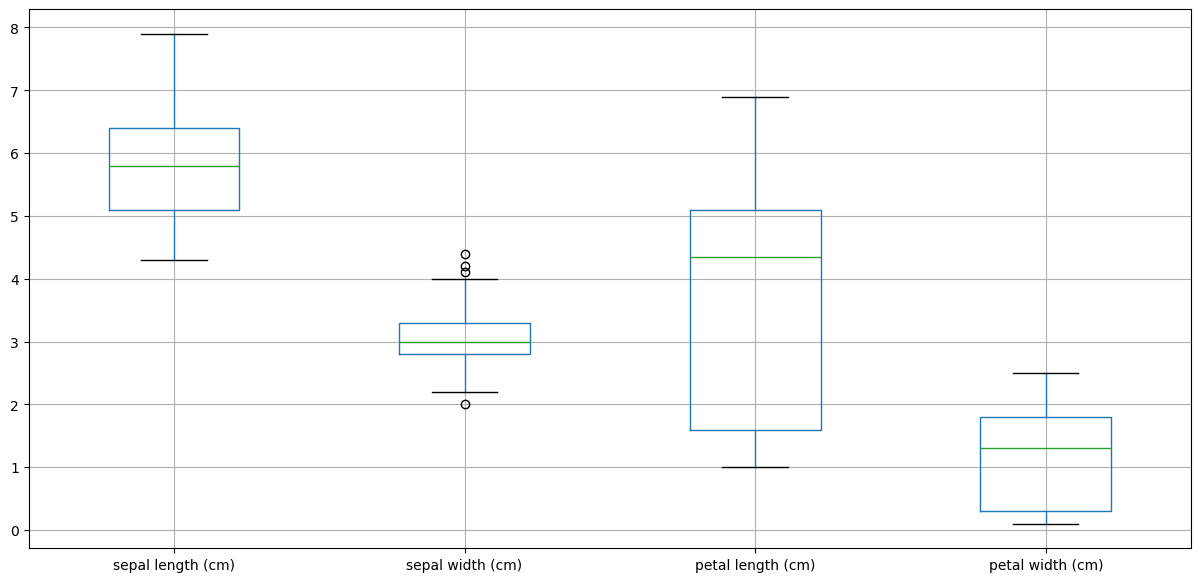

In [7]:
boxplot = X_whole.boxplot(figsize=(15,7))

plt.show()

### División del dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_whole, y_whole,
                                                    stratify=y_whole,
                                                    test_size=0.2)

### **Normalización y estandarización de datos**

La normalización y la estandarización son técnicas de preprocesamiento que consisten en escalar o transformar los datos para que se encuentren dentro de una misma escala, lo cual facilita el entrenamiento de diversos modelos de aprendizaje automático.

#### Normalización

La normalización transforma los datos a un rango fijo, comúnmente entre 0 y 1, utilizando la siguiente fórmula:

$$
x_{norm} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

En *scikit-learn*, la función utilizada para normalizar es **MinMaxScaler**:

```
from sklearn.preprocessing import MinMaxScaler
```

#### Estandarización

La estandarización transforma los datos para que tengan media 0 y varianza 1, de acuerdo con la fórmula:

$$
z = \frac{(x-\mu)}{\sigma}
$$

En *scikit-learn*, la función utilizada para estandarizar es **StandardScaler**:

```
from sklearn.preprocessing import StandardScaler
```

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_train.transform(X_test)

### Entrenamiento del árbol de decisión para un problema de clasificación


**DecisionTreeClassifier** es un modelo de árbol de decisión para un problema de clasificación. Sus parámetos son:

* **criterion** - Mide la calidad de la división de los sub-árboles. Valores: "gini" (default), "log_loss" y "entropy"
* **splitter** - Indica la estrategia usada para dividir cada nodo. Valores: "best" (default), "random".
* **max_depth** - Profundidad máxima del árbol
* **min_samples_split** - Número mínimo de muestras para dividir un nodo interno
* **max_features** - Número de características a considerar para buscar la mejor división
  

REFERENCIA: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier



In [10]:
from sklearn.tree import DecisionTreeClassifier

iris_DTC = DecisionTreeClassifier(random_state=42)

# Para entrenar un DTC se requiere el conjunto de datos de entrenamiento (X, y)
iris_DTC.fit(X_train, y_train)

# Inferencias para X_test
y_pred = iris_DTC.predict(X_test)

### **Características del modelo**

In [11]:
print(f'La profundidad del árbol es {iris_DTC.get_depth()}')
print(f'El número de hojas del árbol es {iris_DTC.get_n_leaves()}')

La profundidad del árbol es 5
El número de hojas del árbol es 9


### Métricas del modelo de clasificación

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



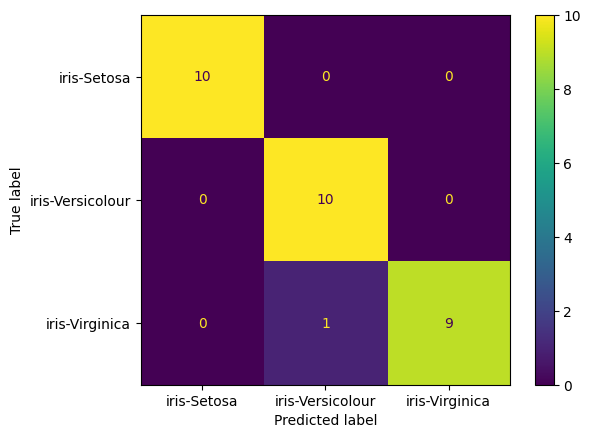

In [13]:
y_labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=y_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot();

## Random Forest



### Entrenamiento de un modelo random forest para un problema de clasificación

In [14]:
from sklearn.ensemble import RandomForestClassifier

iris_RFC = RandomForestClassifier(random_state=42)
iris_RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
iris_RFC.score(X_test, y_test)

# Inferencias para X_test
y_pred_RFC = iris_RFC.predict(X_test)

### Métricas del modelo de clasificación

In [16]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



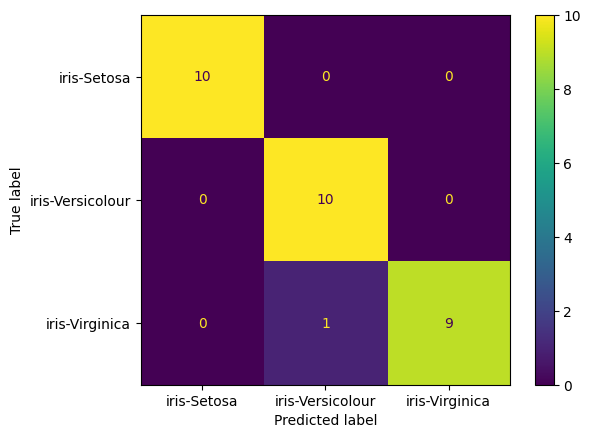

In [17]:
y_labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred_RFC, labels=y_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot();